## Parte 1: Desarrollo de redes neuronales
Objetivos: 
1. Identificar columnas numéricas y columnas categóricas.
2. Diseñar una red de neuronas para resolver un problema de **regresión**.
3. Utilizar métricas para evaluar el modelo generado.

### 1.1 Datos ganaderos de Catalunya
Se trabajará únicamente con las columnas: [CODI POSTAL EXPLOTACIO,SERVEI TERRITORIAL  EXPLOTACIÓ,PROVINCIA EXPLOTACIÓ,COMARCA EXPLOTACIÓ,MUNICIPI EXPLOTACIÓ,TIPUS EXPLOTACIÓ,ESPÈCIE, INTEGRADORA, NOM ADS,CLASSIFICACIÓ ZOOTÈCNICA,DATA CLASSIFICACIÓ ZOOTÈCNICA,SISTEMA PRODUCTIU,CRITERI DE SOSTENIBILITAT,CAPACITAT PRODUCTIVA,TOTAL CAP PONEDORES,TOTAL URM,TOTAL NITROGEN].

El modelo a generar debe trabajar con TOTAL_URM o TOTAL_NITROGEN como variable a predecir. A elección del grupo. 

In [1]:
# Importar libería para cargar los datos
import pandas as pd 

# Se carga el archivo CSV de los datos ganaderos de Catalunya
data = pd.read_csv('carga_ganadera.csv')

# Se crea una lista con las columnas que vamos a utilizar
columnas = [
    'CODI POSTAL EXPLOTACIO', 'SERVEI TERRITORIAL  EXPLOTACIÓ', 'PROVINCIA EXPLOTACIÓ',
    'COMARCA EXPLOTACIÓ', 'MUNICIPI EXPLOTACIÓ', 'TIPUS EXPLOTACIÓ', 'ESPÈCIE', 
    'INTEGRADORA', 'NOM ADS', 'CLASSIFICACIÓ ZOOTÈCNICA', 'DATA CLASSIFICACIÓ ZOOTÈCNICA',
    'SISTEMA PRODUCTIU', 'CRITERI DE SOSTENIBILITAT', 'CAPACITAT PRODUCTIVA', 
    'TOTAL CAP PONEDORES', 'TOTAL URM', 'TOTAL NITROGEN'
]

# Filtramos el dataframe original para que solo contenga las columnas de interés
data = data[columnas]

In [2]:
# Ver información de cada columna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26338 entries, 0 to 26337
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CODI POSTAL EXPLOTACIO          26331 non-null  float64
 1   SERVEI TERRITORIAL  EXPLOTACIÓ  26338 non-null  object 
 2   PROVINCIA EXPLOTACIÓ            26338 non-null  object 
 3   COMARCA EXPLOTACIÓ              26338 non-null  object 
 4   MUNICIPI EXPLOTACIÓ             26338 non-null  object 
 5   TIPUS EXPLOTACIÓ                26338 non-null  object 
 6   ESPÈCIE                         26338 non-null  object 
 7   INTEGRADORA                     5895 non-null   object 
 8   NOM ADS                         11422 non-null  object 
 9   CLASSIFICACIÓ ZOOTÈCNICA        19246 non-null  object 
 10  DATA CLASSIFICACIÓ ZOOTÈCNICA   19206 non-null  object 
 11  SISTEMA PRODUCTIU               26006 non-null  object 
 12  CRITERI DE SOSTENIBILITAT       

In [3]:
# Seleccionamos las columnas categóricas (de tipo 'object')
categorical_columns = data.select_dtypes(include=['object']).columns

# Mostramos las columnas categóricas
categorical_columns

Index(['SERVEI TERRITORIAL  EXPLOTACIÓ', 'PROVINCIA EXPLOTACIÓ',
       'COMARCA EXPLOTACIÓ', 'MUNICIPI EXPLOTACIÓ', 'TIPUS EXPLOTACIÓ',
       'ESPÈCIE', 'INTEGRADORA', 'NOM ADS', 'CLASSIFICACIÓ ZOOTÈCNICA',
       'DATA CLASSIFICACIÓ ZOOTÈCNICA', 'SISTEMA PRODUCTIU',
       'CRITERI DE SOSTENIBILITAT', 'CAPACITAT PRODUCTIVA'],
      dtype='object')

**1.1.1 Conversión a One-Hot Encoding**
___

Convertir las columnas categóricas a one-hot encoding. (1 ptos)

In [4]:
# Importamos la librería OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Extraemos las columnas categóricas del dataframe
x_categorical = data[categorical_columns]

# Se ingnoran categorías nuevas que no fueron vistas durante el ajuste.
encoder = OneHotEncoder(handle_unknown='ignore')

# Se tranforman las columnas en una representación one-hot encoded
x_encoded = encoder.fit_transform(x_categorical)

# Generamos una lista de nombres para las nuevas columnas codificadas
categorical_encoded_columns = [
    f'{col}_{cat}' for i, col in enumerate(x_categorical.columns) for cat in encoder.categories_[i]
]

# Convertimos la matriz dispersa en un dataframe denso, donde cada columna es una categoría one-hot codificada
x_encoded_df = pd.DataFrame(x_encoded.toarray(), columns=categorical_encoded_columns)

# Concatenamos el dataframe original (excluyendo las columnas categóricas originales) 
df = pd.concat([data.drop(columns=categorical_columns), x_encoded_df], axis=1)

# Mostramos las primeras filas del nuevo dataframe
df.head()

,CODI POSTAL EXPLOTACIO,TOTAL CAP PONEDORES,TOTAL URM,TOTAL NITROGEN,SERVEI TERRITORIAL EXPLOTACIÓ_Alt Pirineu,SERVEI TERRITORIAL EXPLOTACIÓ_Barcelona,SERVEI TERRITORIAL EXPLOTACIÓ_Catalunya Central,SERVEI TERRITORIAL EXPLOTACIÓ_Girona,SERVEI TERRITORIAL EXPLOTACIÓ_Lleida,SERVEI TERRITORIAL EXPLOTACIÓ_Tarragona,...,CRITERI DE SOSTENIBILITAT_Integrat,CRITERI DE SOSTENIBILITAT_nan,CAPACITAT PRODUCTIVA_Grup I,CAPACITAT PRODUCTIVA_Grup II,CAPACITAT PRODUCTIVA_Grup III,CAPACITAT PRODUCTIVA_Grup IV,CAPACITAT PRODUCTIVA_No professional,CAPACITAT PRODUCTIVA_Professional,CAPACITAT PRODUCTIVA_Reduida,CAPACITAT PRODUCTIVA_nan
0,25651.0,0,5.80,372.05,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25651.0,0,290.88,17574.00,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25651.0,0,4.00,255.20,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,25651.0,0,4.00,255.20,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,25651.0,0,197.02,11875.25,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Mostramos la forma del nuevo dataframe
df.shape

(26338, 5402)

**1.1.2 Red Neuronal para TOTAL_URM  -  random_state=42**
___

Construir una red de neuronas para identificar el `TOTAL_URM` o `TOTAL_NITROGEN`. (3.5 ptos) 
Se evaluará el loss function utilizado en cada capa.

Usamos esta sentencia de código para ver que columnas tenian NaN, lo cual no dejaba ejecutar la función de activación de sigmoid

``nan_columns = x_train.columns[x_train.isnull().any()]``  
``print('Columnas con NaN en x_train:', nan_columns)``

In [6]:
# Importamos las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import numpy as np

# Establecemos una semilla
tf.random.set_seed(
    42
)

# Se define la variable objetivo a predecir
target_variable = 'TOTAL URM'

# Se divide el dataframe en características (X) y la variable objetivo (Y)
x = df.drop(columns=[target_variable])
y = df[target_variable]

# Se dividen los datos en conjuntos de entrenamiento (80%) y prueba (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Se verifica si existen valores NaN en los conjuntos de datos
print('NaN en x_train:', x_train.isnull().any().any())
print('NaN en x_test:', x_test.isnull().any().any())

# Manejar NaN - Imputación con la media
imputer = SimpleImputer(strategy='mean')
imputer.fit(x_train)

# Llenamos los datos que faltan en los conjuntos de entrenamiento y prueba usando la media de cada columna.
x_train_imputed = pd.DataFrame(imputer.transform(x_train), columns=x_train.columns, index=x_train.index)
x_test_imputed = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns, index=x_test.index)

# Ajustamos los datos para que todos los valores estén en la misma escala, haciendo que la media sea 0 y la dispersión sea 1.
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_test_scaled = scaler.transform(x_test_imputed)

# Revisamos de nuevo si quedan valores vacíos (NaN) después de haberlos llenado.
print('NaN en x_train:', x_train_imputed.isnull().any().any())
print('NaN en x_test:', x_test_imputed.isnull().any().any())

# MODELO CON FUNCIONES DE ACTIVACIÓN 'RELU'
model_relu = keras.models.Sequential()
model_relu.add(keras.layers.InputLayer(shape=[x_train_scaled.shape[1]])) # Capa de entrada
model_relu.add(keras.layers.Dense(200, activation="relu"))  # Capa oculta con 200 neuronas y activación ReLU
model_relu.add(keras.layers.Dense(100, activation="relu"))  # Capa oculta con 100 neuronas y activación ReLU
model_relu.add(keras.layers.Dense(50, activation="relu"))   # Capa oculta con 50 neuronas y activación ReLU
model_relu.add(keras.layers.Dense(20, activation="relu"))   # Capa oculta con 20 neuronas y activación ReLU
model_relu.add(keras.layers.Dense(1, activation="linear"))  # Capa de salida con activación lineal

# MODELO CON FUNCIONES DE ACTIVACIÓN 'SIGMOID'
model_sigmoid = keras.models.Sequential()
model_sigmoid.add(keras.layers.InputLayer(shape=[x_train_scaled.shape[1]])) # Capa de entrada
model_sigmoid.add(keras.layers.Dense(200, activation="sigmoid"))    # Capa oculta con 200 neuronas y activación Sigmoid
model_sigmoid.add(keras.layers.Dense(100, activation="sigmoid"))    # Capa oculta con 100 neuronas y activación Sigmoid
model_sigmoid.add(keras.layers.Dense(50, activation="sigmoid"))     # Capa oculta con 50 neuronas y activación Sigmoid
model_sigmoid.add(keras.layers.Dense(20, activation="sigmoid"))     # Capa oculta con 20 neuronas y activación Sigmoid
model_sigmoid.add(keras.layers.Dense(1, activation="linear"))       # Capa de salida con activación lineal

# MODELO CON FUNCIONES DE ACTIVACIÓN 'TANH'
model_tanh = keras.models.Sequential()
model_tanh.add(keras.layers.InputLayer(shape=[x_train_scaled.shape[1]])) # Capa de entrada
model_tanh.add(keras.layers.Dense(200, activation="tanh"))  # Capa oculta con 200 neuronas y activación Tanh
model_tanh.add(keras.layers.Dense(100, activation="tanh"))  # Capa oculta con 100 neuronas y activación Tanh
model_tanh.add(keras.layers.Dense(50, activation="tanh"))   # Capa oculta con 50 neuronas y activación Tanh
model_tanh.add(keras.layers.Dense(20, activation="tanh"))   # Capa oculta con 20 neuronas y activación Tanh
model_tanh.add(keras.layers.Dense(1, activation="linear"))  # Capa de salida con activación lineal

# MODELO CON FUNCIONES DE ACTIVACIÓN 'ELU'
model_elu = keras.models.Sequential()
model_elu.add(keras.layers.InputLayer(shape=[x_train_scaled.shape[1]])) # Capa de entrada
model_elu.add(keras.layers.Dense(200, activation="elu"))    # Capa oculta con 200 neuronas y activación ELU
model_elu.add(keras.layers.Dense(100, activation="elu"))    # Capa oculta con 100 neuronas y activación ELU
model_elu.add(keras.layers.Dense(50, activation="elu"))     # Capa oculta con 50 neuronas y activación ELU
model_elu.add(keras.layers.Dense(20, activation="elu"))     # Capa oculta con 20 neuronas y activación ELU
model_elu.add(keras.layers.Dense(1, activation="linear"))   # Capa de salida con activación lineal

NaN en x_train: True
NaN en x_test: False
NaN en x_train: False
NaN en x_test: False


**1.1.3 Evaluación de desenvolvimiento del modelo - 50 épocas**
___

In [9]:
# Compilamos el modelo con activación ReLU
model_relu.compile(
    optimizer='adam', # Optimizador Adam
    loss='mean_squared_error', # Función de pérdida: MSE
    metrics=['mean_absolute_error'] # Métrica: MAE
)

# Compilamos el modelo con activación Sigmoid
model_sigmoid.compile(
    optimizer='adam', # Optimizador Adam
    loss='mean_squared_error', # Función de pérdida: MSE
    metrics=['mean_absolute_error'] # Métrica: MAE
)

# Compilamos el modelo con activación Tanh
model_tanh.compile(
    optimizer='adam', # Optimizador Adam
    loss='mean_squared_error', # Función de pérdida: MSE
    metrics=['mean_absolute_error'] # Métrica: MAE
)

# Compilamos el modelo con activación ELU
model_elu.compile(
    optimizer='adam', # Optimizador Adam
    loss='mean_squared_error', # Función de pérdida: MSE
    metrics=['mean_absolute_error'] # Métrica: MAE
)

In [10]:
# Entrenamos el modelo con activación ReLU
history_relu = model_relu.fit(
    x_train_scaled, y_train,
    validation_data=(x_test_scaled, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Entrenamos el modelo con activación Sigmoid
history_sigmoid = model_sigmoid.fit(
    x_train_scaled, y_train,
    validation_data=(x_test_scaled, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Entrenamos el modelo con activación Tanh
history_tanh = model_tanh.fit(
    x_train_scaled, y_train,
    validation_data=(x_test_scaled, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Entrenamos el modelo con activación ELU
history_elu = model_elu.fit(
    x_train_scaled, y_train,
    validation_data=(x_test_scaled, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - loss: 14786.3379 - mean_absolute_error: 59.4836 - val_loss: 4563.0962 - val_mean_absolute_error: 36.9972
Epoch 2/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 5352.7822 - mean_absolute_error: 36.7695 - val_loss: 4274.0161 - val_mean_absolute_error: 35.4869
Epoch 3/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 2826.1836 - mean_absolute_error: 28.4219 - val_loss: 4051.1052 - val_mean_absolute_error: 32.8803
Epoch 4/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 2022.3947 - mean_absolute_error: 24.3735 - val_loss: 3623.8770 - val_mean_absolute_error: 32.0982
Epoch 5/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 1610.1882 - mean_absolute_error: 21.7397 - val_loss: 3865.7256 - val_mean_absolute_error: 32.3709
Epoch 6/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 1312.8586 - mean_absolute_error: 20.3039 - val_loss: 3636.1694 - val_mean_absolute_error: 31.5012
Epoch 7/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 8s 1

In [11]:
# Resumen de la arquitectura del modelo con activación ReLU
model_relu.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200)            │     1,080,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,319,775 (12.66 MB)

 Trainable params: 1,106,591 (4.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,213,184 (8.44 MB)

In [12]:
# Resumen de la arquitectura del modelo con activación Sigmoid
model_sigmoid.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 200)            │     1,080,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,319,775 (12.66 MB)

 Trainable params: 1,106,591 (4.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,213,184 (8.44 MB)

In [13]:
# Resumen de la arquitectura del modelo con activación Tanh
model_tanh.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 200)            │     1,080,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,319,775 (12.66 MB)

 Trainable params: 1,106,591 (4.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,213,184 (8.44 MB)

In [14]:
# resumen de la arquitectura del modelo con activación ELU
model_elu.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 200)            │     1,080,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,319,775 (12.66 MB)

 Trainable params: 1,106,591 (4.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,213,184 (8.44 MB)

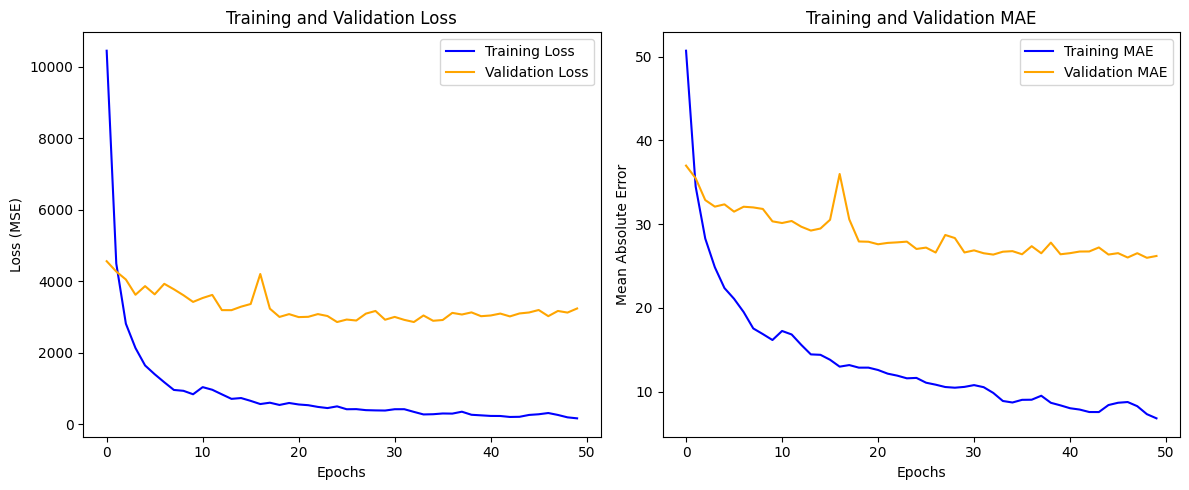

In [15]:
# Extraemos el historial de entrenamiento y validación del modelo ReLU
history_dict = history_relu.history

# Configuramos el tamaño de la figura para los gráficos
plt.figure(figsize=(12, 5))

# Primer gráfico: Pérdida (Loss) de entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss', color='blue')
plt.plot(history_dict['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()

# Segundo gráfico: Error Absoluto Medio (MAE) de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(history_dict['mean_absolute_error'], label='Training MAE', color='blue')
plt.plot(history_dict['val_mean_absolute_error'], label='Validation MAE', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()

# Ajustamos el diseño de la figura para evitar que los gráficos se solapen
plt.tight_layout()

# Mostramos ambos gráficos en la pantalla
plt.show()

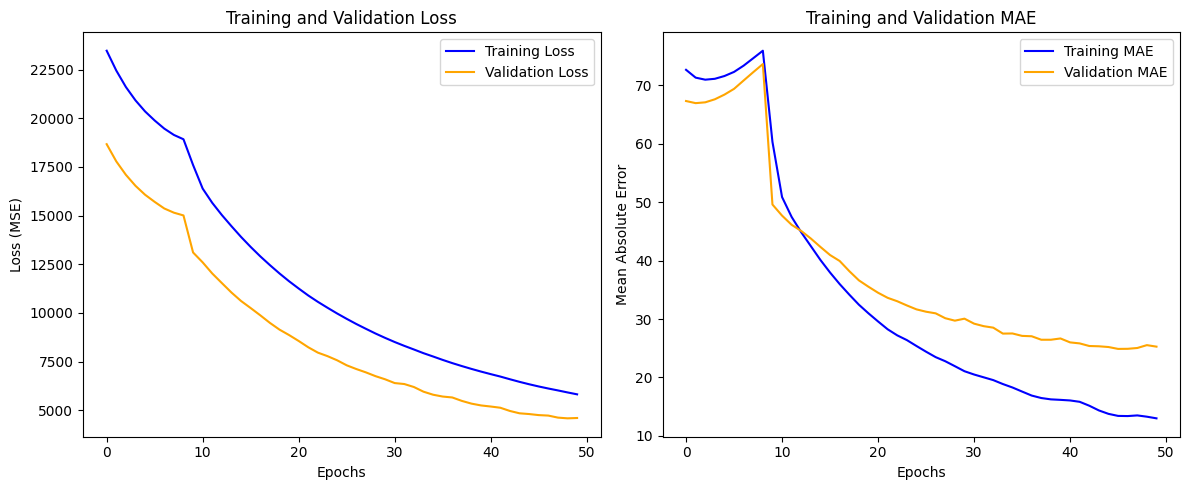

In [16]:
# Extraemos el historial de entrenamiento y validación del modelo Sigmoid
history_dict2 = history_sigmoid.history

# Configuramos el tamaño de la figura para los gráficos
plt.figure(figsize=(12, 5))

# Primer gráfico: Pérdida (Loss) de entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(history_dict2['loss'], label='Training Loss', color='blue')
plt.plot(history_dict2['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()

# Segundo gráfico: Error Absoluto Medio (MAE) de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(history_dict2['mean_absolute_error'], label='Training MAE', color='blue')
plt.plot(history_dict2['val_mean_absolute_error'], label='Validation MAE', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()

# Ajustamos el diseño de la figura para evitar que los gráficos se solapen
plt.tight_layout()

# Mostramos ambos gráficos en la pantalla
plt.show()

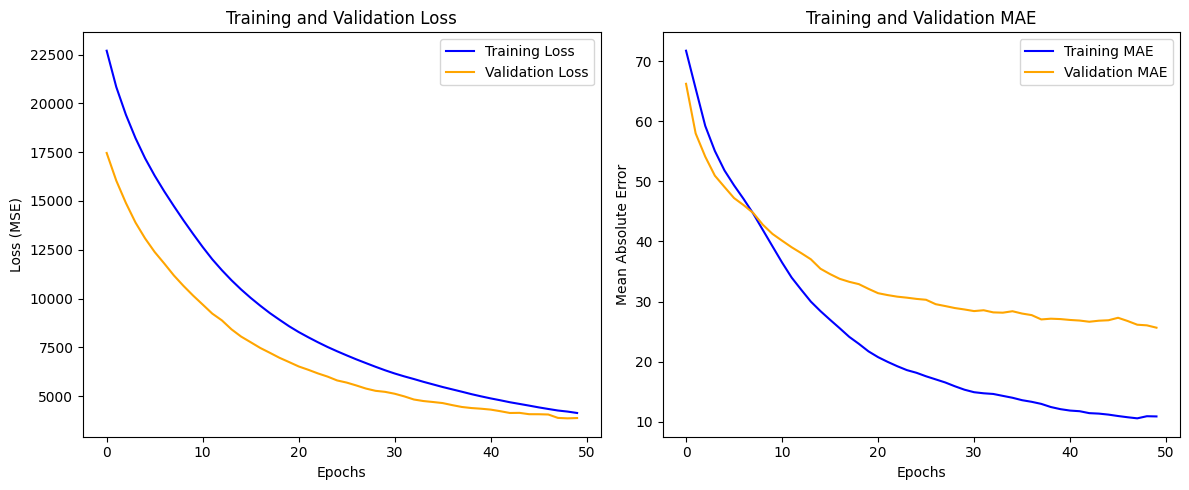

In [17]:
# Extraemos el historial de entrenamiento y validación del modelo Tanh
history_dict3 = history_tanh.history

# Configuramos el tamaño de la figura para los gráficos
plt.figure(figsize=(12, 5))

# Primer gráfico: Pérdida (Loss) de entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(history_dict3['loss'], label='Training Loss', color='blue')
plt.plot(history_dict3['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()

# Segundo gráfico: Error Absoluto Medio (MAE) de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(history_dict3['mean_absolute_error'], label='Training MAE', color='blue')
plt.plot(history_dict3['val_mean_absolute_error'], label='Validation MAE', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()

# Ajustamos el diseño de la figura para evitar superposición de los gráficos
plt.tight_layout()

# Mostramos los gráficos
plt.show()

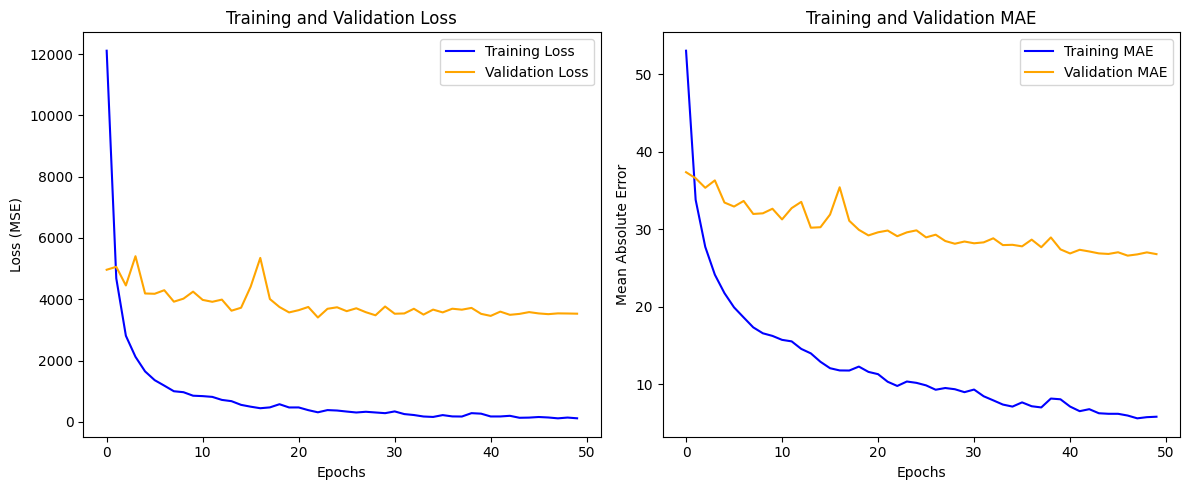

In [18]:
# Extraemos el historial de entrenamiento y validación del modelo ELU
history_dict4 = history_elu.history

# Configuramos el tamaño del los gráficos
plt.figure(figsize=(12, 5))

# Primer gráfico: Pérdida (Loss) de entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(history_dict4['loss'], label='Training Loss', color='blue')
plt.plot(history_dict4['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()

# Segundo gráfico: Error Absoluto Medio (MAE) de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(history_dict4['mean_absolute_error'], label='Training MAE', color='blue')
plt.plot(history_dict4['val_mean_absolute_error'], label='Validation MAE', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()

# Ajustamos la figura para que los gráficos no se superpongan
plt.tight_layout()

# Mostramos los gráficos en pantalla
plt.show()

In [19]:
# Importar las métricas para evaluar el desempeño de los modelos
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Se generan las predicciones para el conjunto de prueba usando cada uno de los modelos
y_pred_relu = model_relu.predict(x_test_scaled)
y_pred_sigmoid = model_sigmoid.predict(x_test_scaled)
y_pred_tanh = model_tanh.predict(x_test_scaled)
y_pred_elu = model_elu.predict(x_test_scaled)

# Calcular métricas para el modelo con activación ReLU
mse_relu = mean_squared_error(y_test, y_pred_relu)
mae_relu = mean_absolute_error(y_test, y_pred_relu)
r2_relu = r2_score(y_test, y_pred_relu)

# Mostramos las métricas para el modelo con activación ReLU
print("\nMétricas para el modelo con ReLU:")
print(f"Mean Squared Error (MSE): {mse_relu:.2f}")
print(f"Mean Absolute Error (MAE): {mae_relu:.2f}")
print(f"R² Score: {r2_relu * 100:.2f}%")

# Calcular métricas para el modelo con activación Sigmoid
mse_sigmoid = mean_squared_error(y_test, y_pred_sigmoid)
mae_sigmoid = mean_absolute_error(y_test, y_pred_sigmoid)
r2_sigmoid = r2_score(y_test, y_pred_sigmoid)

# Mostramos las métricas para el modelo con activación Sigmoid
print("\nMétricas para el modelo con Sigmoid:")
print(f"Mean Squared Error (MSE): {mse_sigmoid:.2f}")
print(f"Mean Absolute Error (MAE): {mae_sigmoid:.2f}")
print(f"R² Score: {r2_sigmoid * 100:.2f}%")

# Calcular métricas para el modelo con activación Tanh
mse_tanh = mean_squared_error(y_test, y_pred_tanh)
mae_tanh = mean_absolute_error(y_test, y_pred_tanh)
r2_tanh = r2_score(y_test, y_pred_tanh)

# Mostramos las métricas para el modelo con activación Tanh
print("\nMétricas para el modelo con Sigmoid:")
print(f"Mean Squared Error (MSE): {mse_tanh:.2f}")
print(f"Mean Absolute Error (MAE): {mae_tanh:.2f}")
print(f"R² Score: {r2_tanh * 100:.2f}%")

# Calcular métricas para el modelo con activación ELU
mse_elu = mean_squared_error(y_test, y_pred_elu)
mae_elu = mean_absolute_error(y_test, y_pred_elu)
r2_elu = r2_score(y_test, y_pred_elu)

# Mostramos las métricas para el modelo con activación ELU
print("\nMétricas para el modelo con Sigmoid:")
print(f"Mean Squared Error (MSE): {mse_elu:.2f}")
print(f"Mean Absolute Error (MAE): {mae_elu:.2f}")
print(f"R² Score: {r2_elu * 100:.2f}%")

165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Métricas para el modelo con ReLU:
Mean Squared Error (MSE): 3240.32
Mean Absolute Error (MAE): 26.21
R² Score: 78.16%

Métricas para el modelo con Sigmoid:
Mean Squared Error (MSE): 4603.16
Mean Absolute Error (MAE): 25.28
R² Score: 68.98%

Métricas para el modelo con Sigmoid:
Mean Squared Error (MSE): 3879.59
Mean Absolute Error (MAE): 25.64
R² Score: 73.85%

Métricas para el modelo con Sigmoid:
Mean Squared Error (MSE): 3529.02
Mean Absolute Error (MAE): 26.80
R² Score: 76.22%


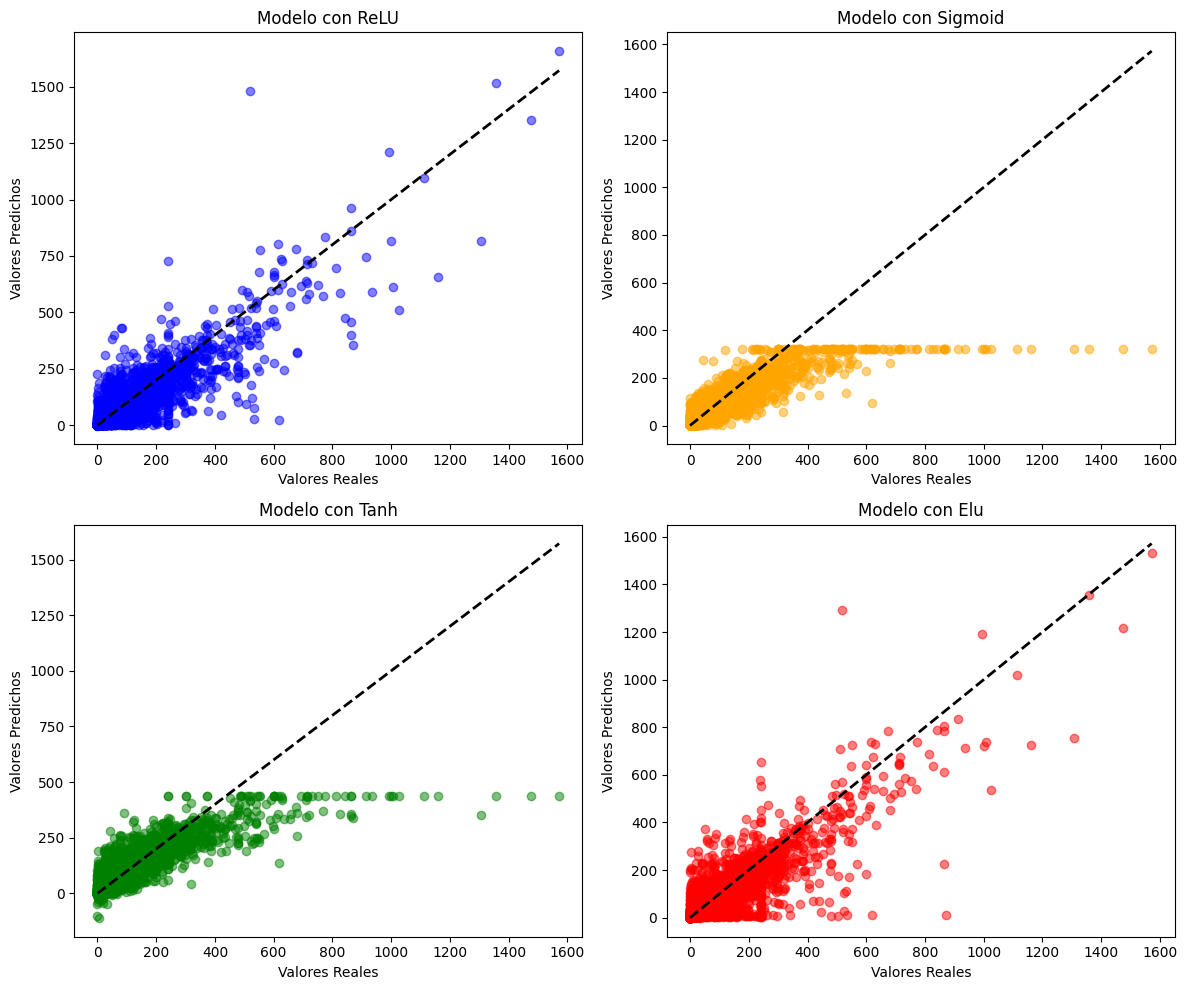

In [20]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(12, 10))

# Gráfico de dispersión para el modelo con ReLU
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_relu, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Modelo con ReLU')

# Gráfico de dispersión para el modelo con Sigmoid
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_sigmoid, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Modelo con Sigmoid')

# Gráfico de dispersión para el modelo con Tanh
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_tanh, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Modelo con Tanh')

# Gráfico de dispersión para el modelo con Elu
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_elu, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Modelo con Elu')

# Se ajusta la disposición de los gráficos
plt.tight_layout()

# Se muestra los gráficos
plt.show()

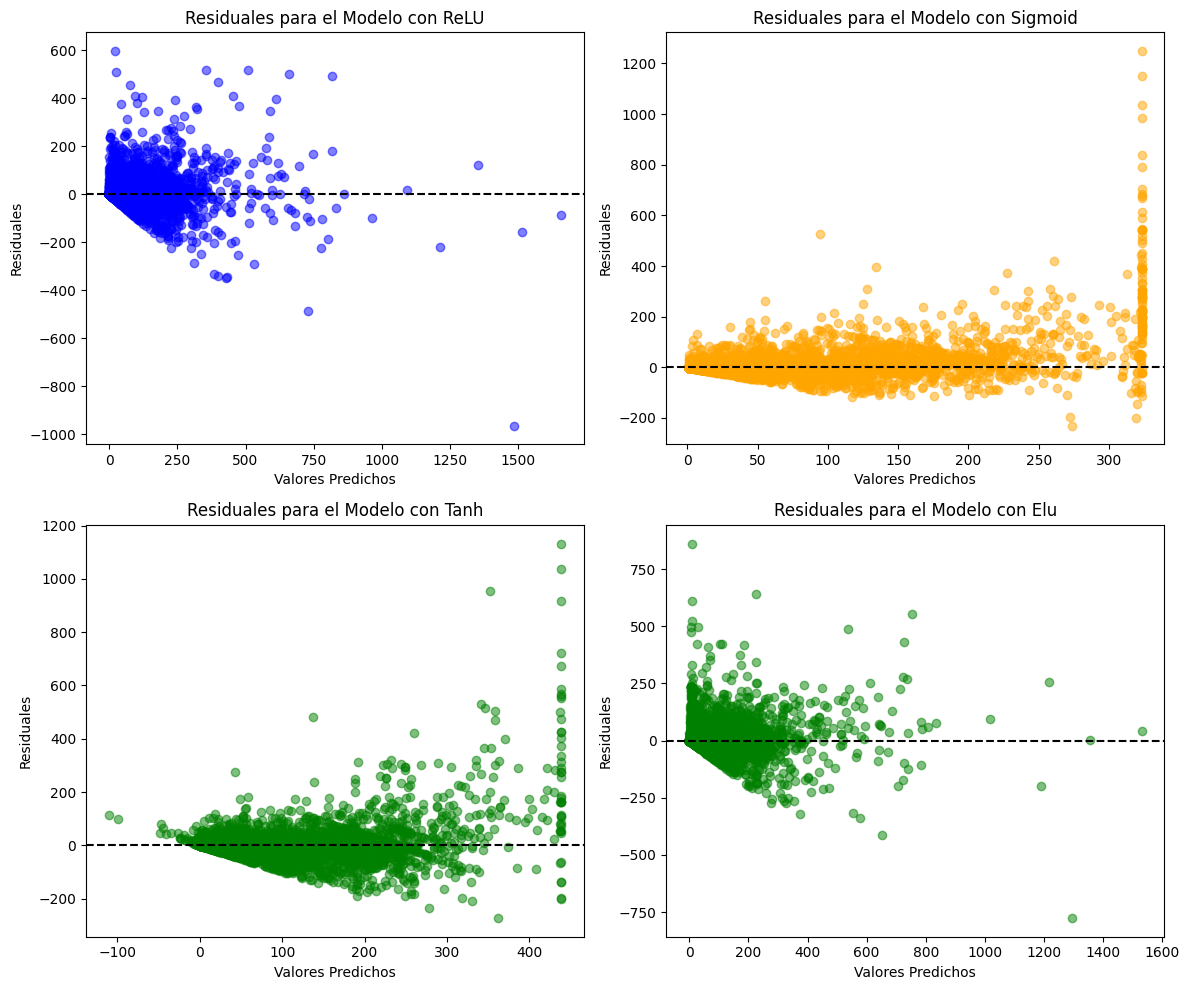

In [21]:

# Configuramos el tamaño de la figura
plt.figure(figsize=(12, 10))

# Gráfico de residuales para el modelo con activación ReLU
residuals_relu = y_test - y_pred_relu.flatten()
plt.subplot(2, 2, 1)
plt.scatter(y_pred_relu, residuals_relu, alpha=0.5, color='blue')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.title('Residuales para el Modelo con ReLU')

# Gráfico de residuales para el modelo con activación Sigmoid
residuals_sigmoid = y_test - y_pred_sigmoid.flatten()
plt.subplot(2, 2, 2)
plt.scatter(y_pred_sigmoid, residuals_sigmoid, alpha=0.5, color='orange')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.title('Residuales para el Modelo con Sigmoid')

# Gráfico de residuales para el modelo con activación Tanh
residuals_tanh = y_test - y_pred_tanh.flatten()
plt.subplot(2, 2, 3)
plt.scatter(y_pred_tanh, residuals_tanh, alpha=0.5, color='green')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.title('Residuales para el Modelo con Tanh')

# Gráfico de residuales para el modelo con activación ELU
residuals_elu = y_test - y_pred_elu.flatten()
plt.subplot(2, 2, 4)
plt.scatter(y_pred_elu, residuals_elu, alpha=0.5, color='green')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.title('Residuales para el Modelo con Elu')

# Ajustamos el diseño de la figura
plt.tight_layout()

# Mostramos los gráficos
plt.show() 

**1.1.4 Análisis de resultados**
___

1. **Evaluación de las métricas (MSE, MAE, R²):**

    |Modelo  |MSE     |MAE     |R² Score|
    |--------|--------|--------|--------|
    |ReLU    |3240.32 |26.21   |78.16%  |
    |Sigmoid |4603.16 |25.28   |68.98%  |
    |Tanh    |3879.59 |25.64   |73.85%  |
    |ELU     |3529.02 |26.80   |76.22%  |           
                                           
- **MSE (Error Cuadrático Medio):** El MSE más bajo se alcanzó con el modelo ReLU (3240.32), lo que indica que las predicciones de este modelo son más cercanas a los valores reales en promedio. El modelo Sigmoid tuvo el peor rendimiento con el MSE más alto (4603.16), lo que sugiere mayores errores en las predicciones.
- **MAE (Error Absoluto Medio):** En términos de MAE, el modelo Sigmoid presentó el menor error promedio (25.28), mientras que ELU tuvo el mayor MAE (26.80). Sin embargo, aunque el MAE de Sigmoid es el más bajo, su alto MSE indica que tiene errores significativos en algunos puntos.
- **R² Score:** El modelo ReLU también obtuvo el mejor R² (78.16%), lo que indica que explica mejor la variabilidad de los datos. El peor R² lo tuvo Sigmoid (68.98%), lo que sugiere que no ajusta los datos tan bien como los demás.

2. **Gráficos de dispersión de predicciones vs valores reales:**
- **ReLU:** El gráfico indica que el modelo está haciendo buenas predicciones en general. Sin embargo, hay algunos puntos alejados de la línea de ajuste perfecto, lo que muestra la presencia de errores de predicción en algunos casos.
- **Sigmoid:** Los puntos predichos no se alinean bien con la diagonal, especialmente para valores superiores a 400, donde el modelo tiende a subestimar los valores reales. Esto es consistente con el hecho de que el modelo Sigmoid tiene el peor MSE y R².
- **Tanh:** Los valores predichos están más alineados que en el modelo Sigmoid, pero no tan bien como en el modelo ReLU. Hay una tendencia a subestimar los valores más altos.
- **ELU:** Los valores predichos para ELU están distribuidos de manera más uniforme en torno a la diagonal, pero algunos puntos están claramente fuera de la línea de ajuste perfecto, lo que indica predicciones erróneas en algunos casos.

3. **Gráficos de residuales:**
- **ReLU:** Los residuales muestran una mayor concentración alrededor de 0 para valores predichos menores a 500, lo que indica que el modelo está prediciendo bien en este rango. Sin embargo, hay algunos errores grandes en los valores más altos, lo que afecta el rendimiento general del modelo.
- **Sigmoid:** Los residuales muestran una clara tendencia negativa, lo que indica que el modelo está consistentemente subestimando los valores más altos. Esta tendencia es particularmente evidente para valores predichos entre 200 y 300.
- **Tanh:** El gráfico de residuales muestra una distribución similar a ReLU, pero con más dispersión para los valores más altos. Esto indica que el modelo no está prediciendo tan consistentemente como ReLU, pero es mejor que Sigmoid.
- **ELU:** Los residuales de ELU muestran una tendencia más uniforme, con algunas predicciones muy lejanas del valor real. Sin embargo, al igual que ReLU, los errores más grandes se observan en valores altos.
    

### 1.2 Datos jugadores del FIFA
El dataset en la actividad incluye información sobre la performance de cada jugador en el juego FIFA. 

1. Tratamiento de los datos. Cada jugador tiene una posición determinada `team_position` y según la columna que tiene el mismo valor, tiene un puntaje. (0.5 pts)
   1. De acuerdo a ese puntaje, asignar las siguientes categorías:
      * Poor:[46.0, 62.0]
      * Interm:[63.0, 66.0]	
      * Good:[67.0, 71.0]	
      * Excel:[72.0, 94.0]   
2. Generación del modelo de clasificación, tomando en cuenta esta nueva columna a partir de las columnas (2.5 pts)
   * Considera las siguientes columnas como features: `attacking_crossing	attacking_finishing	attacking_heading_accuracy	attacking_short_passing	attacking_volleys	skill_dribbling	skill_curve	skill_fk_accuracy	skill_long_passing	skill_ball_control	movement_acceleration	movement_sprint_speed	movement_agility	movement_reactions	movement_balance	power_shot_power	power_jumping	power_stamina	power_strength	power_long_shots	mentality_aggression	mentality_interceptions	mentality_positioning	mentality_vision	mentality_penalties	mentality_composure	defending_marking	defending_standing_tackle	defending_sliding_tackle	goalkeeping_diving	goalkeeping_handling	goalkeeping_kicking	goalkeeping_positioning	goalkeeping_reflexes`. 
3. Generar el análisis y gráficas para analizar la performance del modelo. (2 pts)

In [22]:
# Se importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Cargar los datos de los jugadores desde el archivo CSV
data_players = pd.read_csv('players_20.csv')

# Mostrar las primeras tres filas del dataset
data_players.head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


In [24]:
# Verificar las posiciones únicas de los jugadores en el equipo
data_players['team_position'].unique()

array(['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM',
       'RCB', 'LCM', 'LM', 'CF', 'SUB', 'LB', 'LS', 'RB', 'RDM', 'RES',
       'RAM', 'RS', 'RF', 'CM', 'CB', 'LF', 'LAM', nan, 'RWB', 'LWB'],
      dtype=object)

**1.2.1 Tratamiento de datos**
___

In [25]:
# Convertimos los valores de la columna 'team_position' a minúsculas para estandarizar los datos
data_players['team_position'] = data_players['team_position'].str.lower()

In [26]:
# Eliminamos los registros que tengan valores NAN en las columnas clave de posiciones de jugadores
columnas_a_verificar = ['rw', 'lw', 'cam', 'rcm', 'lcb', 'st', 'cdm', 'ldm', 'rm',
                        'rcb', 'lcm', 'lm', 'cf', 'lb', 'ls', 'rb', 'rdm',
                        'ram', 'rs', 'rf', 'cm', 'cb', 'lf', 'lam', 'rwb', 'lwb']

# Borramos los registros que tengan valores faltantes en cualquiera de las columnas de posiciones
data_players = data_players.dropna(subset=columnas_a_verificar)

# Nos quedamos solo con los números antes del "+"
def extract_main_score(score):
    try:
        if pd.notna(score) and '+' in str(score):
            return int(str(score).split('+')[0])
        elif pd.notna(score):
            return int(score)
    except ValueError:
        return np.nan

# Aplicamos la función de extracción de puntaje a cada columna
for columna in columnas_a_verificar:
    data_players[columna] = data_players[columna].apply(extract_main_score)

In [27]:
# Visualizamos las primeras tres filas
data_players.head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68,66,66,66,68,63,52,52,52,63
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65,61,61,61,65,61,53,53,53,61
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66,61,61,61,66,61,46,46,46,61


In [29]:
# Nos quedamos solo con las filas donde la posición del equipo esté en la lista de columnas a verificar
data_players = data_players[data_players['team_position'].isin(columnas_a_verificar)]

# Definimos una función para obtener el puntaje basado en la posición del jugador
def get_score_from_position(row):
    position = row['team_position']
    if position in data_players.columns and pd.notna(row[position]):
        return row[position]
    else:
        return None

# Crear una nueva columna que contendrá el puntaje de cada jugador según su posición en el equipo
data_players['score_from_position'] = data_players.apply(get_score_from_position, axis=1)

In [30]:
# Verificamos el estado actual
data_players

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,score_from_position
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,66,66,66,68,63,52,52,52,63,93
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,61,61,61,65,61,53,53,53,61,89
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,61,61,61,66,61,46,46,46,61,90
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,63,63,63,66,61,49,49,49,61,89
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77,77,77,77,73,66,66,66,73,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18149,243084,https://sofifa.com/player/243084/guoyuan-yang/...,Yang Guoyuan,杨国元,22,1997-04-09,175,72,China PR,Henan Jianye FC,...,46,46,46,45,45,47,47,47,45,48
18153,251586,https://sofifa.com/player/251586/yeljan-shinar...,Yeljan Shinar,Yeljan Shinar,20,1999-06-06,178,70,China PR,Shenzhen FC,...,41,41,41,42,45,48,48,48,45,45
18155,247339,https://sofifa.com/player/247339/maxime-kouogu...,M. Kouogun,Maxime Kouogun,22,1997-03-14,184,81,Cameroon,Waterford FC,...,42,42,42,42,45,49,49,49,45,49
18182,252584,https://sofifa.com/player/252584/joe-white/20/...,J. White,Joe White,17,2002-01-18,188,72,England,Bolton Wanderers,...,42,42,42,47,48,47,47,47,48,48


In [31]:
# Definimos una función para categorizar el rendimiento del jugador según su puntaje en la posición
def categorize_performance(score):
    if 46 <= score <= 62:
        return 'Poor'
    elif 63 <= score <= 66:
        return 'Interm'
    elif 67 <= score <= 71:
        return 'Good'
    elif 72 <= score <= 94:
        return 'Excel'
    else:
        return 'Unknown'

# Aplicamos la función para crear la nueva columna categorizada
data_players['categoria_segun_position'] = data_players['score_from_position'].apply(categorize_performance)

# Eliminamos las filas con la categoría 'Unknown' (si existieran)
data_players = data_players[data_players['categoria_segun_position'] != 'Unknown']

In [32]:
# Contamos la cantidad de jugadores en cada categoría de rendimiento
data_players['categoria_segun_position'].value_counts()

categoria_segun_position
Good      2024
Interm    1685
Excel     1593
Poor      1290
Name: count, dtype: int64

**1.2.2 Modelo de clasificación**
___

In [33]:
# Definimos las columnas que se utilizarán como características para el modelo de clasificación.
features = [
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
    'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
    'movement_reactions', 'movement_balance', 'power_shot_power',
    'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
    'mentality_aggression', 'mentality_interceptions', 'mentality_positioning',
    'mentality_vision', 'mentality_penalties', 'mentality_composure',
    'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle',
    'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
    'goalkeeping_positioning', 'goalkeeping_reflexes'
]

# Seleccionamos las columnas de características para usarlas como variables independientes (X) en el modelo
x_players = data_players[features]

# Definimos la columna 'categoria_segun_position' como nuestra variable dependiente (y),

y_players = data_players['categoria_segun_position']

In [34]:
# Importamos las bibliotecas necesarias para construir y entrenar el modelo de clasificación
from tensorflow import keras
import tensorflow as tf

# Fijamos una semilla aleatoria
tf.random.set_seed(
    42
)

# Codificamos las etiquetas categóricas ('y_players') a valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_players)

# Dividimos los datos en conjuntos de entrenamiento y prueba
x_train_players, x_test_players, y_train_players, y_test_players = train_test_split(x_players, y_encoded, test_size=0.2, random_state=42)

# Definimos cuántas columnas de features estamos utilizando
input_dim = x_players.shape[1]

# Construimos un modelo secuencial de Keras, comenzando por especificar la capa de entrada con el tamaño de las características
model_players = keras.models.Sequential()
model_players.add(keras.layers.Input(shape=(input_dim,)))

# Añadimos 10 capas ocultas densas (fully connected) al modelo, cada una con 100 neuronas y la función de activación 'relu'
for _ in range(10):
    model_players.add(keras.layers.Dense(100, activation='relu'))
model_players.add(keras.layers.Dense(4, activation='softmax'))

In [35]:
# Compilamos el modelo definiendo el optimizador, la función de pérdida y la métrica que se utilizarán durante el entrenamiento
model_players.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [36]:
# Entrenamos el modelo
history_cat_players = model_players.fit(
    x_train_players, 
    y_train_players, 
    epochs=100, 
    batch_size=32, 
    validation_data=(x_test_players, y_test_players)
)

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3354 - loss: 1.3883 - val_accuracy: 0.4397 - val_loss: 1.1487
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4512 - loss: 1.1425 - val_accuracy: 0.5208 - val_loss: 1.0131
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4813 - loss: 1.0953 - val_accuracy: 0.5178 - val_loss: 0.9925
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5038 - loss: 1.0606 - val_accuracy: 0.5459 - val_loss: 0.9627
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5110 - loss: 1.0598 - val_accuracy: 0.5754 - val_loss: 0.9540
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5154 - loss: 1.0343 - val_accuracy: 0.5732 - val_loss: 0.9332
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5439 - loss: 0.9938 - val_accuracy: 0.5823 - val_loss: 0.9111
Epoch 8/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5426 - loss: 0.9757 - val_accu

In [37]:
# Mostramos un resumen de la arquitectura del modelo
model_players.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 100)            │         3,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 4)              │           404 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 284,414 (1.08 MB)

 Trainable params: 94,804 (370.33 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 189,610 (740.67 KB)

In [38]:
# Librería para generar reportes de clasificacion
from sklearn.metrics import classification_report

# Utilizamos el modelo entrenado para hacer predicciones sobre los datos de prueba
y_pred = model_players.predict(x_test_players)

# Convertimos las predicciones en clases, seleccionando la clase con la mayor probabilidad para cada jugador
y_pred_classes = y_pred.argmax(axis=1)

# Generamos un reporte de clasificación
report = classification_report(y_test_players, y_pred_classes, target_names=label_encoder.classes_)

# Imprimimos el reporte
print(report)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

       Excel       0.85      0.94      0.90       338
        Good       0.75      0.82      0.78       401
      Interm       0.72      0.69      0.71       327
        Poor       0.94      0.73      0.82       253

    accuracy                           0.80      1319
   macro avg       0.82      0.80      0.80      1319
weighted avg       0.81      0.80      0.80      1319



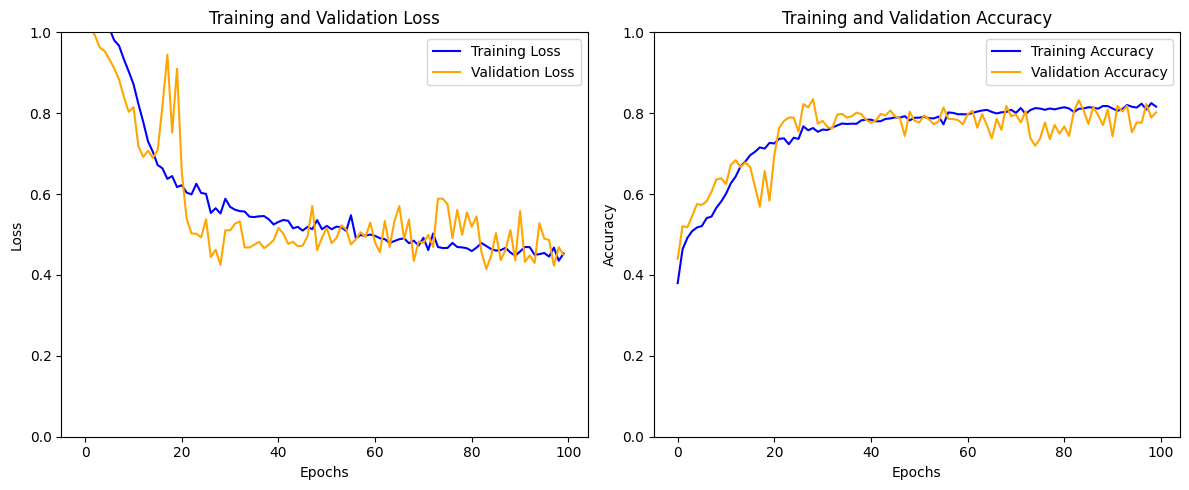

In [39]:
# Extraemos el historial de entrenamiento
history_players = history_cat_players.history

# Configuramos el tamaño de la figura
plt.figure(figsize=(12, 5))

# Creamos el primer gráfico en un subplot: gráfico de pérdida (loss) para entrenamiento y validación a lo largo de las épocas
plt.subplot(1, 2, 1)
plt.plot(history_players['loss'], label='Training Loss', color='blue')
plt.plot(history_players['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.title('Training and Validation Loss')
plt.legend()

# Creamos el segundo gráfico en un subplot: gráfico de precisión (accuracy) para entrenamiento y validación a lo largo de las épocas
plt.subplot(1, 2, 2)
plt.plot(history_players['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_players['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.title('Training and Validation Accuracy')
plt.legend()

# Ajustamos la figura
plt.tight_layout()

# Mostramos los gráficos
plt.show()

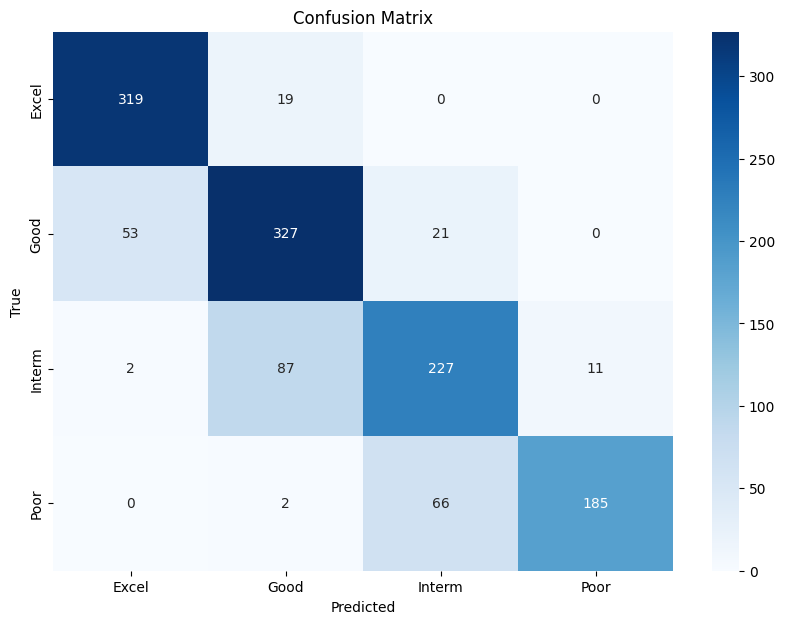

In [41]:
import seaborn as sns # Librería para visualización de datos
import matplotlib.pyplot as plt # Para la creación de gráficos
from sklearn.metrics import confusion_matrix # Para generar la matriz de confusión

# Calculamos la matriz de confusión comparando las predicciones con las clases reales en los datos de prueba
cm = confusion_matrix(y_test_players, y_pred_classes)

# Creamos una figura para mostrar la matriz de confusión
plt.figure(figsize=(10, 7))

# Se crea un mapa de calor de la matriz de confusión
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

# Etiquetas para los ejes
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Mostramos el gráfico
plt.show()

**1.2.3 Análisis de graficos de la performance del modelo**
___

1. **Análisis del Gráfico de Pérdida (Loss):**  
Al inicio ambas curvas (entrenamiento y validación) comienzan con una pérdida elevada. A lo largo de las épocas, se puede observar como como la pérdida va disminuyendo en ambas curvas, lo que nos dice que el modelo esta aprendiendo. Durante las primeras 20-30 épocas, la pérdida disminuye de manera significativa. Aunque la pérdida en los datos de entrenamiento continúa disminuyendo, la pérdida en los datos de validación muestra una tendencia menos estable, lo que puede ser un indicio de sobreajuste.

2. **Análisis del Gráfico de Precisión (Accuracy):**  
La precisión de ambos conjuntos (entrenamiento y validación) empieza baja y luego aumenta de forma continua durante las primeras 30 épocas, lo que sugiere que el modelo está aprendiendo correctamente. Después de la época 30, la precisión tanto en el conjunto de entrenamiento como en el de validación se estabiliza cerca de 0.8. Al igual que en la curva de pérdida, hay fluctuaciones en la precisión del conjunto de validación, lo que también sugiere un posible sobreajuste.

**1.2.4 Análisis de resultados**
___

El análisis de la matriz de confusión muestra que el modelo tiene un buen desempeño general en la predicción de las categorías de desempeño de los jugadores, especialmente en las categorías superiores como "Excel" y "Good". En la categoría "Excel", se identificaron correctamente 319 jugadores, con algunos errores hacia "Good" (53) y "Interm" (2). Para "Good", 327 jugadores fueron clasificados correctamente, aunque hubo confusiones con "Excel" y "Interm". La categoría "Interm" presentó más dificultades, con 227 predicciones correctas, pero una cantidad significativa de jugadores fueron confundidos con "Good" y "Poor". Por último, el modelo también identificó bien a los jugadores de la categoría "Poor" (185 aciertos), aunque algunos fueron clasificados incorrectamente como "Interm". En general, el modelo funciona bien con las clases extremas (Excel y Poor), pero tiene dificultades para distinguir claramente las clases intermedias.

## Parte 2: Índice latinoamericano de IA
Revisar el índide Latinoamericano de Inteligencia Artificial https://indicelatam.cl/. También disponible en PDF en el blackboard.
Responder a las siguientes preguntas:

1. ¿Cuál es el objetivo principal del Índice Latinoamericano de IA y cómo se mide el progreso en la región? **(0.5 pts)**


> El ILIA tiene como objetivo ayudar a que la Inteligencia Artificial se desarrolle de manera más inclusiva en América Latina. Busca aprovechar las oportunidades, identificar las diferencias que aún existen, y ayudar a impulsar acciones concretas para que la IA avance de manera beneficiosa para todos en la región. Para medir cómo vamos, el índice usa más de 70 indicadores, organizados en dimensiones como Factores Habilitantes, Investigación, Desarrollo y Gobernanza. 

2. ¿Qué países de Latinoamérica lideran actualmente el ranking del Índice Latinoamericano de IA y por qué? **(0.5 pts)**

> En el ILIA 2024, los países que están liderando el camino son Chile, Brasil y Uruguay. Lo que los hace destacar es su trabajo en diferentes áreas clave, como tener una buena infraestructura tecnológica, fomentar el talento especializado, promover la ciencia y la innovación. Estos países se encuentran en lo que se llama el "Cuadrante I", lo que básicamente significa que tienen un entorno bastante favorable para el desarrollo de la IA y, por eso, están bien posicionados para ser líderes regionales.

3. ¿Cuáles son los principales desafíos que enfrenta la región para avanzar en la adopción y desarrollo de la Inteligencia Artificial? **(0.5 pts)**

> Algunos de los grandes problemas que enfrenta la región para desarrollar la IA incluyen la falta de talento especializado y la dificultad para retener a los expertos que se forman, ya que muchos terminan yéndose a otros países. Además, falta infraestructura adecuada, como computadoras de alto rendimiento y acceso a redes rápidas. También hay una gran brecha de género, lo que significa que las mujeres aún están subrepresentadas tanto en los estudios como en el uso de la IA.

4. ¿De qué manera el Índice Latinoamericano de IA considera la ética y la responsabilidad social en el desarrollo de la IA? **(0.5 pts)**

> El índice también se preocupa por el aspecto ético y la responsabilidad social en el desarrollo de la IA. Evalúa qué tan bien los países están integrando estrategias de IA que respeten estos valores, incluyendo marcos regulatorios para asegurarse de que todo se haga de manera responsable. Por ejemplo, menciona la Metodología RAM de la UNESCO, que sirve como una guía para lograr una IA más ética. Además, hay iniciativas conjuntas con universidades para crear algoritmos más transparentes y justos.

5. ¿Qué iniciativas gubernamentales y privadas están impulsando el desarrollo de la IA en Latinoamérica y cómo se reflejan en el Índice Latinoamericano de IA? **(0.5 pts)**

> En América Latina, hay iniciativas tanto del gobierno como del sector privado para apoyar el desarrollo de la IA. Algunos ejemplos incluyen la inversión en infraestructura tecnológica con apoyo de la CAF y la creación del Grupo de Trabajo por la Ética de la IA, que nació durante la Cumbre de Santiago. También hay programas del BID que buscan ayudar a que más empresas adopten la IA. A nivel privado, grandes empresas como Google, Microsoft y AWS están poniendo su grano de arena para que el desarrollo de la IA en la región sea más equilibrado y responsable.

6. De acuerdo al índice latinoamericano de IA ¿Cuál es el potencial del desarrollo de la inteligencia artificial en el Perú? **(0.5 pts)**

> Perú tiene un gran potencial, pero enfrenta algunos desafíos importantes. En el índice, Perú está en el "Cuadrante III" en lo que respecta a infraestructura y desarrollo de la IA, lo que significa que hay mucho por mejorar. Sin embargo, en el aspecto de gobernanza, está un poco mejor, en el "Cuadrante II", lo que indica que hay un buen ambiente regulatorio. Si Perú logra mejorar en las áreas donde hay más problemas, podría aprovechar mucho mejor las oportunidades que trae la IA.

7. ¿Qué iniciativas puede tomar en el Perú para ascender en el índice latinoamericano? **(1 pts)**

> Para que Perú pueda avanzar en el Índice Latinoamericano de Inteligencia Artificial, lo primero es ponerle atención a la infraestructura tecnológica: mejorar la conectividad, apostar por el 5G y contar con mejor capacidad de computación. Sin esto, no se puede competir. Además, hay que trabajar en formar y retener talento especializado. No basta con educar, también hay que hacer atractivo quedarse en el país. Es clave tener acceso a datos de calidad, y para eso se necesita infraestructura que los respalde y políticas que aseguren su uso responsable. También necesitamos marcos regulatorios que promuevan la IA de forma ética, apoyando tanto la inversión pública como la privada.

## Parte 3: Historia de la Inteligencia Artificial

**Objetivo:** Extraer 4 oraciones clave y 3 ideas (del grupo) sobre el capítulo.

1. Capítulo 1
   1. **"Turing was, for all practical purposes, the inventor of the computer, and shortly after that, he largely invented the field of AI."**
   - "Turing fue, a todos los efectos prácticos, el inventor de la computadora, y poco después de eso, inventó en gran medida el campo de la IA"
   2. **"And if all mathematical decision problems can be solved by following a recipe, then for any decision problem, you should be able to design a Turing machine to solve it."**
   - "Y si todos los problemas de decisión matemática se pueden resolver siguiendo una receta, entonces para cualquier problema de decisión, debería ser posible diseñar una máquina de Turing para resolverlo"
   3. **"The question of whether AI is possible ultimately amounts to whether we can produce intelligent behavior simply by following lists of instructions like these."**
   - La cuestión de si la IA es posible, en última instancia, se reduce a si podemos producir un comportamiento inteligente simplemente siguiendo listas de instrucciones como estas"
   4. **"Although computers are just machines for following instructions, this does not mean that they are incapable of making decisions."**
   - "Aunque las computadoras son simplemente máquinas para seguir instrucciones, esto no significa que sean incapaces de tomar decisiones".

1. Capítulo 2
   1. **"The next two decades were the first boom in AI. There was a flush of optimism, growth, and apparent progress, leading to the era called the golden age of AI, from about 1956 to 1974."**
   - "Las siguientes dos décadas fueron el primer auge de la IA. Hubo un auge de optimismo, crecimiento y aparente progreso, que condujo a la era llamada la edad de oro de la IA, desde aproximadamente 1956 hasta 1974."
   2. **"Instead of starting out trying to build a complete general intelligent system, the approach adopted was to identify the various different individual capabilities that seemed to be required for general-purpose AI and to build systems that could demonstrate these capabilities."**
   - "En lugar de comenzar a intentar construir un sistema inteligente general completo, el enfoque adoptado fue identificar las distintas capacidades individuales que parecían necesarias para una IA de propósito general y construir sistemas que pudieran demostrar esas capacidades."
   3. **"There was a good deal of naivety in the golden age, with researchers making reckless and grandiose predictions about the likely speed of progress in the field, which have haunted AI ever since."**
   - "Hubo mucha ingenuidad en la edad de oro, con investigadores haciendo predicciones imprudentes y grandiosas sobre la posible velocidad de progreso en el campo, lo que ha perseguido a la IA desde entonces."
   4. **"The decade from the early 1970s to the early 1980s later became known as the AI winter, although it should perhaps better be known as the first AI winter, because there were more to come"**
   - "La década que va desde principios de los años 1970 hasta principios de los años 1980 se conoció más tarde como el invierno de la IA, aunque tal vez debería llamarse mejor el primer invierno de la IA, porque aún quedaban más por venir."

1. Capítulo 6
   1. **" In the second decade of the twenty-first century, AI has attracted more interest than any new technology since the World Wide Web in the 1990s."**
   - "En la segunda década del siglo XXI, la IA ha atraído más interés que cualquier otra tecnología nueva desde la aparición de la World Wide Web en los años 90."
   2. **" Everywhere that technology is used, AI is finding applications: in education, science, industry, commerce, agriculture, health care, entertainment, the media and arts, and beyond."**
   - "En todos los lugares donde se utiliza la tecnología, la IA está encontrando aplicaciones: en la educación, la ciencia, la industria, el comercio, la agricultura, la atención sanitaria, el entretenimiento, los medios de comunicación y las artes, y más allá."
   3. **"One important new opportunity for AI-powered health care is what we might call personal health care management."**
   - "Una nueva e importante oportunidad para la atención sanitaria basada en inteligencia artificial es lo que podríamos llamar la gestión de la atención sanitaria personal."
   4. **"If you could find a way for a car to know precisely where it was and what was around it, then you would have solved the problem of driverless cars. The solution to this problem was to be modern machine learning techniques: without them, driverless cars would not be possible"**
   - "Si se pudiera encontrar una manera de que un coche supiera exactamente dónde se encuentra y qué hay a su alrededor, se habría solucionado el problema de los coches sin conductor. La solución a este problema eran las técnicas modernas de aprendizaje automático: sin ellas, los coches sin conductor no serían posibles."

1. Ideas (del grupo)
   1. Alan Turing, con su tería de las máquinas que siguen instrucciones (Máquinas de Turing), creó las bases de las computadoras actuales y de la IA. Los medios introducieron el término "cerebros electrónicos" para describir los primeros ordenadores, lo que dio la impresión errónea de que estas máquinas poseían algún tipo de inteligencia superior. Sin embargo, los ordenadores no eran inteligentes; solo seguían instrucciones, llamadas algoritmos.
   2. En la época dorada de la inteligencia artifial se realizaron muchos avances y se tenia muchas espectativas muy poco realistas de lo que sería capaz de realizar esta tecnologia en el contexto de la época. Sin embargo, pronto se encotraron con barreras debido a las limitaciones tecnologias y debido a criticas fue perdiendo la inversión con la que contaba inicialmente.
   3. El deep learning ha permitido que la inteligencia artificial encuentre aplicaciones en casi todos los aspectos de la vida, desde la medicina hasta la creación de imágenes y la conducción autónoma.